# Business Case: Netflix - Data Exploration and Visualisation

In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [214]:
df = pd.read_csv("netflix.csv")

### 1. Defining Problem Statement and Analysing basic metrics (10 Points)

#### Ans. To analyze the data and generate insights that could help Netflix which type of shows/movies to produce and how they can grow the business in different countries

In [215]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### 2. Observations on the shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary

In [216]:
df.shape # So 8807 samples are provided in the dataset along with 12 features

(8807, 12)

In [217]:
df.columns # lets analyze each feature seperately and understand the data

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [218]:
uniques,unique_counts = np.unique(df['type'],return_counts=True)

In [219]:
uniques

array(['Movie', 'TV Show'], dtype=object)

In [220]:
unique_counts

array([6131, 2676])

In [221]:
# Type datatype consists of the type of the content weather its a "movie" or a "TV show", here we have
# approximate ratio of 2:1 

In [222]:
df.title.head()

0     Dick Johnson Is Dead
1            Blood & Water
2                Ganglands
3    Jailbirds New Orleans
4             Kota Factory
Name: title, dtype: object

In [223]:
# title tells the name of the movie or the show

In [224]:
df['director'].head()

0    Kirsten Johnson
1                NaN
2    Julien Leclercq
3                NaN
4                NaN
Name: director, dtype: object

In [225]:
# director : tells the list of directors who directed the content
# cast :  tells the aritsts who acted in the movie
# country : origin country of the content
# date-added : day when the show is added to netflix (DD/MM/YYYY)
# release-year : release date of the show (YYYY)
# duration : duration of the show
# listed_in : list of shows where the content got telecasted


In [226]:
df['rating'].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

# TV-MA : For Mature Audiences has graphic sex scenes, foul language, explicit violence, or a combination of these elements
# TV-14 : Parents strongly cautioned. May not be suitable for ages under 14
# TV-PG : Parental Guidance suggested
# R : Restricted. May be inappropriate for ages under 17.
# PG-13 : Parents strongly cautioned. May be inappropriate for ages under 13.
# TV-Y7 : Suitable for ages 7 and up
# TV-Y : Appropriate for children of all ages
# PG : Parental Guidance suggested
# TV-G : suitable for all ages; these are not necessarily children's shows

In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [229]:
(100.0*df.isna().sum()/df.shape[0]).round(2)

show_id          0.00
type             0.00
title            0.00
director        29.91
cast             9.37
country          9.44
date_added       0.11
release_year     0.00
rating           0.05
duration         0.03
listed_in        0.00
description      0.00
dtype: float64

In [230]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [231]:
df.describe(include='object')

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


### 5. Missing Value & Outlier check (Treatment optional)

In [232]:
def stacking(df,col):
    col_list = df[col].apply(lambda x : str(x).split(', ')).tolist()
    df_col = pd.DataFrame(col_list,index=df['title'])
    df_col = df_col.stack()
    df_col = pd.DataFrame(df_col)
    df_col.reset_index(inplace=True)
    df_col=df_col[['title', 0]]
    df_col.columns = ['title', col]
    return df_col

In [233]:
df_dir = stacking(df,'director')
df_cast = stacking(df,'cast')
df_country = stacking(df,'country')
df_listed = stacking(df,'listed_in')

In [234]:
df_final = df_dir.merge(df_cast,on='title')
df_final = df_final.merge(df_country,on='title')
df_final = df_final.merge(df_listed,on='title')

In [235]:
df_final.drop_duplicates(inplace=True)  
# dropping duplicates because in some cases in the cast names have repeated twice

In [236]:
df_final.columns

Index(['title', 'director', 'cast', 'country', 'listed_in'], dtype='object')

In [237]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [238]:
df_t = df_final[['director','country','title']].drop_duplicates().replace('nan',np.nan).dropna()

In [239]:
df_t1 = df_t.groupby(['director','country']).count().reset_index()

In [240]:
def samp_fun(sub_df):
    argmx = sub_df['title'].argmax()
    return sub_df.iloc[argmx,1]

In [241]:
dir_cnt = df_t1.groupby(['director']).apply(samp_fun)

In [242]:
dir_cnt

director
A. L. Vijay              India
A. Raajdheep             India
A. Salaam                India
A.R. Murugadoss          India
Aadish Keluskar          India
                        ...   
Éric Warin              Canada
Ísold Uggadóttir       Belgium
Óskar Thór Axelsson    Iceland
Ömer Faruk Sorak        Turkey
Şenol Sönmez            Turkey
Length: 4739, dtype: object

In [243]:
df_t = df_final[['cast','country','title']].drop_duplicates().replace('nan',np.nan).dropna()

In [244]:
df_t1 = df_t.groupby(['cast','country']).count().reset_index()

In [245]:
cast_cnt = df_t1.groupby(['cast']).apply(samp_fun)

In [246]:
cast_cnt

cast
 Jr.                      United States
"Riley" Lakdhar Dridi            France
'Najite Dede                    Nigeria
2 Chainz                  United States
2Mex                      United States
                              ...      
Şevket Çoruh                     Turkey
Şinasi Yurtsever                 Turkey
Şükran Ovalı                     Turkey
Şükrü Özyıldız                   Turkey
Ṣọpẹ́ Dìrísù             United Kingdom
Length: 34321, dtype: object

In [247]:
def replace_dir_cnt(row):
    if row['country']=='nan':
        if row['director']!='nan' and row['director'] in dir_cnt:
            return dir_cnt[row['director']]
        elif row['cast']!='nan' and row['cast'] in cast_cnt:
            return cast_cnt[row['cast']]
        else:
            return row['country']
        
    else:
        return row['country']

In [248]:
df_final['country_imput'] = df_final.apply(replace_dir_cnt,axis=1)

In [249]:
df_final.head()

,title,director,cast,country,listed_in,country_imput
0,Dick Johnson Is Dead,Kirsten Johnson,nan,United States,Documentaries,United States
1,Blood & Water,nan,Ama Qamata,South Africa,International TV Shows,South Africa
2,Blood & Water,nan,Ama Qamata,South Africa,TV Dramas,South Africa
3,Blood & Water,nan,Ama Qamata,South Africa,TV Mysteries,South Africa
4,Blood & Water,nan,Khosi Ngema,South Africa,International TV Shows,South Africa


In [250]:
# data miss written in the rating column instead of duration column so adjusting the data

In [251]:
df.loc[df['duration'].isna(),'duration'] = df.loc[df['duration'].isna(),'rating']

In [252]:
(df['duration'].apply(lambda x : len(x.split()))).value_counts()

2    8807
Name: duration, dtype: int64

In [253]:
df_dur = pd.DataFrame(df['duration'].apply(lambda x : x.split()).tolist())

In [254]:
df_dur.columns=['duration_time','duration_units']

In [255]:
df = pd.concat([df,df_dur],axis=1)

In [256]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_time,duration_units
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90,min
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2,Seasons
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1,Season
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1,Season
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2,Seasons


In [257]:
df['date_added'] = pd.to_datetime(df['date_added'])

In [258]:
df.loc[df['date_added'].isna(),'date_added'] = pd.to_datetime(df.loc[df['date_added'].isna(),'release_year'],format='%Y')

In [259]:
df['date_added'].isna().sum()

0

### 3. Non-Graphical Analysis: Value counts and unique attributes 

In [260]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_time,duration_units
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90,min
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2,Seasons
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1,Season
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1,Season
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2,Seasons


In [261]:
df_final.head()

,title,director,cast,country,listed_in,country_imput
0,Dick Johnson Is Dead,Kirsten Johnson,nan,United States,Documentaries,United States
1,Blood & Water,nan,Ama Qamata,South Africa,International TV Shows,South Africa
2,Blood & Water,nan,Ama Qamata,South Africa,TV Dramas,South Africa
3,Blood & Water,nan,Ama Qamata,South Africa,TV Mysteries,South Africa
4,Blood & Water,nan,Khosi Ngema,South Africa,International TV Shows,South Africa


In [262]:
df_final = df_final.merge(df.drop(columns = [ 'director', 'cast', 'country', 'listed_in']),on='title').reset_index(drop=True)

In [263]:
df_final.head()

,title,director,cast,country,listed_in,country_imput,show_id,type,date_added,release_year,rating,duration,description,duration_time,duration_units
0,Dick Johnson Is Dead,Kirsten Johnson,nan,United States,Documentaries,United States,s1,Movie,2021-09-25,2020,PG-13,90 min,"As her father nears the end of his life, filmm...",90,min
1,Blood & Water,nan,Ama Qamata,South Africa,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",2,Seasons
2,Blood & Water,nan,Ama Qamata,South Africa,TV Dramas,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",2,Seasons
3,Blood & Water,nan,Ama Qamata,South Africa,TV Mysteries,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",2,Seasons
4,Blood & Water,nan,Khosi Ngema,South Africa,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",2,Seasons


In [264]:
df_final['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [265]:
df_final.groupby(['type'])['title'].nunique()

type
Movie      6131
TV Show    2676
Name: title, dtype: int64

In [266]:
df_final['country_imput'].unique()

array(['United States', 'South Africa', 'France', 'nan', 'India',
       'Argentina', 'Ghana', 'Burkina Faso', 'United Kingdom', 'Germany',
       'Ethiopia', 'Thailand', 'Czech Republic', 'Brazil', 'Mexico',
       'Spain', 'Turkey', 'Australia', 'South Korea', 'Belgium',
       'Finland', 'China', 'Canada', 'Japan', 'Nigeria', 'Sweden',
       'Singapore', 'Philippines', 'Taiwan', 'Italy', 'Romania',
       'Venezuela', 'Angola', 'Mauritius', 'Hong Kong', 'Russia', 'Chile',
       '', 'Colombia', 'Ireland', 'Poland', 'Norway', 'Egypt', 'Nepal',
       'New Zealand', 'Greece', 'Jordan', 'Switzerland', 'Israel',
       'Bulgaria', 'Algeria', 'Denmark', 'Saudi Arabia', 'Indonesia',
       'Portugal', 'Kuwait', 'Cameroon', 'Netherlands', 'Malaysia',
       'Vietnam', 'Hungary', 'Lebanon', 'Austria', 'Syria', 'Iceland',
       'United Arab Emirates', 'Qatar', 'Palestine', 'Uruguay', 'Cuba',
       'United Kingdom,', 'Kenya', 'Luxembourg', 'Cambodia', 'Bangladesh',
       'Cayman Islands',

In [267]:
df_final.groupby(['country_imput'])['title'].nunique().reset_index().sort_values('title',ascending=False)

,country_imput,title
119,United States,3854
47,India,1157
117,United Kingdom,843
127,nan,581
22,Canada,488
...,...,...
33,East Germany,1
83,Panama,1
15,Botswana,1
106,Sri Lanka,1


In [268]:
df_final['director'].unique()

array(['Kirsten Johnson', 'nan', 'Julien Leclercq', ...,
       'Majid Al Ansari', 'Peter Hewitt', 'Mozez Singh'], dtype=object)

In [269]:
df_final.groupby(['director'])['title'].nunique().reset_index().sort_values('title',ascending=False)

,director,title
4978,nan,2634
3749,Rajiv Chilaka,22
1906,Jan Suter,21
3800,Raúl Campos,19
4457,Suhas Kadav,16
...,...,...
635,Brandon Camp,1
2295,Juan Antin,1
2296,Juan Antonio de la Riva,1
2297,Juan Camilo Pinzon,1


In [270]:
df_final['cast'].unique()

array(['nan', 'Ama Qamata', 'Khosi Ngema', ..., 'Malkeet Rauni',
       'Anita Shabdish', 'Chittaranjan Tripathy'], dtype=object)

In [271]:
df_final.groupby(['cast'])['title'].nunique().reset_index().sort_values('title',ascending=False)

,cast,title
36316,nan,825
2833,Anupam Kher,43
30489,Shah Rukh Khan,35
16697,Julie Tejwani,33
24215,Naseeruddin Shah,32
...,...,...
14221,Jamie Lee,1
14219,Jamie Kenna,1
14218,Jamie Kaler,1
14217,Jamie Johnston,1


In [272]:
df_final['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [273]:
df_final.groupby(['rating'])['title'].nunique().reset_index().sort_values('title',ascending=False)

,rating,title
11,TV-MA,3207
9,TV-14,2160
12,TV-PG,863
8,R,799
7,PG-13,490
14,TV-Y7,334
13,TV-Y,307
6,PG,287
10,TV-G,220
5,NR,80


### 4. Visual Analysis - Univariate, Bivariate after pre-processing of the data

Note: Pre-processing involves unnesting of the data in columns like Actor, Director, Country

4.1 For continuous variable(s): Distplot, countplot, histogram for univariate analysis

4.2 For categorical variable(s): Boxplot

4.3 For correlation: Heatmaps, Pairplots

### 6. Insights based on Non-Graphical and Visual Analysis (10 Points)

6.1 Comments on the range of attributes

6.2 Comments on the distribution of the variables and relationship between them

6.3 Comments for each univariate and bivariate plot

In [274]:
df_dur_plot = df.loc[df['type']=='Movie']

<AxesSubplot:xlabel='duration_time', ylabel='Count'>

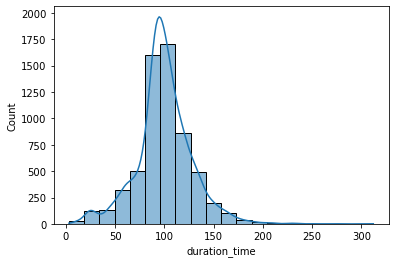

In [275]:
sns.histplot(x=df_dur_plot['duration_time'].apply(int),bins=20,kde=True)

### Indicates average duration of movies is around 100 minutes

<AxesSubplot:xlabel='duration_time', ylabel='count'>

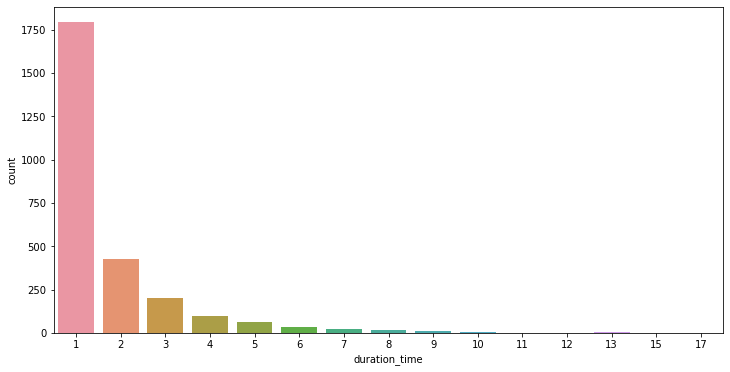

In [276]:
plt.figure(figsize=(12,6))
sns.countplot(x=df.loc[df['type']=='TV Show','duration_time'].apply(int))

### Most of the TV shows have 1 season, only few of them went to decent  4-5 seasons
#### Dropping the show with 1 or 2 seasons might result in loss in profit due to the money spent in promoting the series in the initial seasons

In [277]:
df['year_added'] = df['date_added'].dt.year

In [278]:
eachyr_df = df.groupby(['type','year_added'])['show_id'].count().reset_index()

(2012.0, 2021.9)

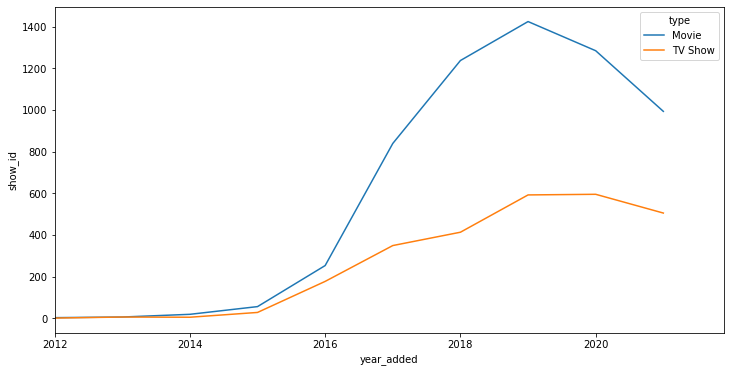

In [279]:
plt.figure(figsize=(12,6))
sns.lineplot(data=eachyr_df,x='year_added',y='show_id',hue='type')
plt.xlim([2012, None])

### TV shows are catching up recently along ith the movies and most recent 2021 even with the fall of movies, there is not much fall in TV shows, this shows that TV shows are gaining popularity

In [280]:
df_t = df_final.groupby(['director'])['title'].nunique().reset_index().sort_values('title',ascending=False)
directors10 = df_t.loc[df_t['title']>=10,'director'].tolist()

In [281]:
directors10.remove('nan')

In [283]:
directors10

['Rajiv Chilaka',
 'Jan Suter',
 'Raúl Campos',
 'Suhas Kadav',
 'Marcus Raboy',
 'Jay Karas',
 'Cathy Garcia-Molina',
 'Martin Scorsese',
 'Youssef Chahine',
 'Jay Chapman',
 'Steven Spielberg',
 'Don Michael Paul']

In [340]:
df_dir_type = df_final.loc[df_final['director'].isin(directors10),['director','type','title','duration_time']].drop_duplicates()

In [346]:
df_dir_type.groupby(['director'])['title'].count().reset_index().sort_values('title',ascending=False).director.tolist()

['Rajiv Chilaka',
 'Jan Suter',
 'Raúl Campos',
 'Marcus Raboy',
 'Suhas Kadav',
 'Jay Karas',
 'Cathy Garcia-Molina',
 'Jay Chapman',
 'Martin Scorsese',
 'Youssef Chahine',
 'Steven Spielberg',
 'Don Michael Paul']

<AxesSubplot:xlabel='director', ylabel='count'>

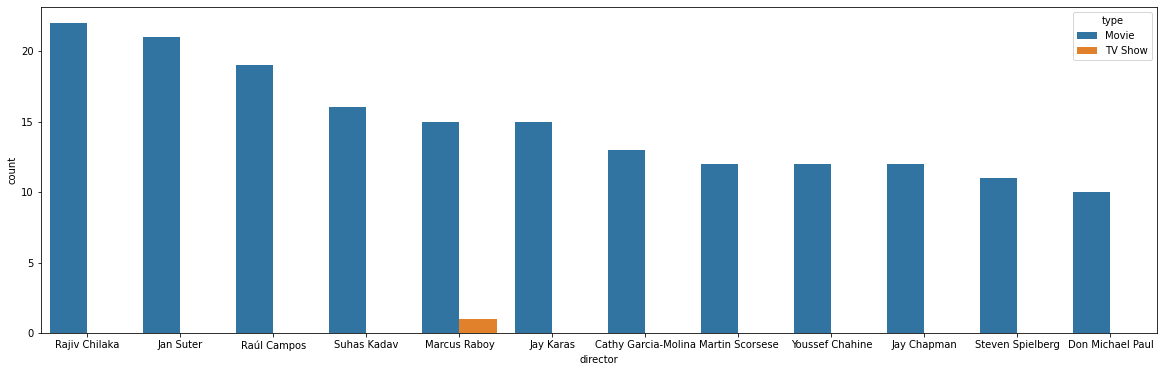

In [347]:
plt.figure(figsize=(20,6))
sns.countplot(data=df_dir_type,x='director',hue='type',order=directors10)

<AxesSubplot:xlabel='director', ylabel='duration_time'>

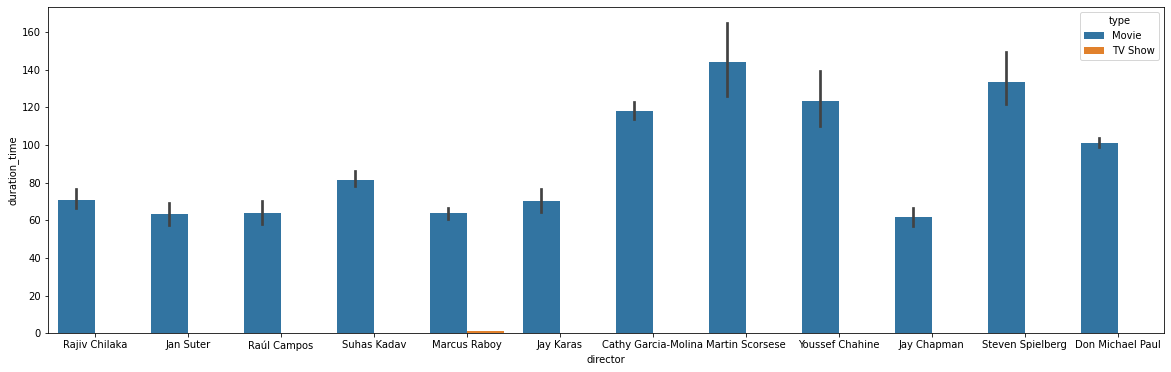

In [348]:
plt.figure(figsize=(20,6))
sns.barplot(data=df_dir_type,
x='director',y='duration_time',estimator=np.mean,hue='type',order=directors10)

### from the above 2 plots , we can infer that directors who make frequent movies, tends to have lesser duration of movies

In [360]:
df['director'].isna().value_counts()

False    6173
True     2634
Name: director, dtype: int64

In [361]:
df[df['type']=='TV Show']['director'].isna().value_counts()

True     2446
False     230
Name: director, dtype: int64

#### In the missing director column values 90%of the missing values are from TV Shows, so hence we are not replacing them, just leaving as nan

In [363]:
# most popular actor

In [366]:
df_pop = df_final.loc[df_final['cast']!='nan',['cast','country','title']].drop_duplicates()

In [388]:
df_t = df_pop.groupby('country')['title'].nunique().reset_index().sort_values('title',ascending=False).head(10)
df_t

,country,title
112,United States,3283
45,India,1007
110,United Kingdom,708
119,nan,677
20,Canada,414
36,France,361
53,Japan,309
97,South Korea,227
99,Spain,209
38,Germany,207


<AxesSubplot:xlabel='country', ylabel='title'>

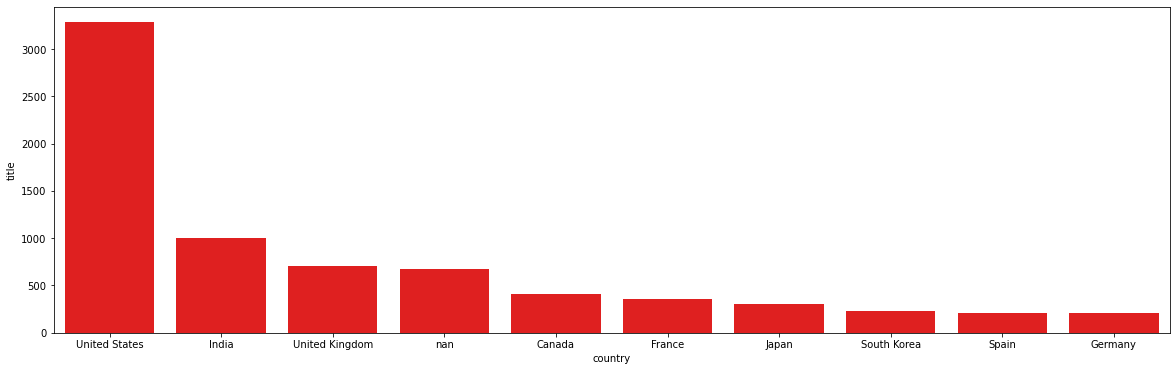

In [391]:
plt.figure(figsize=(20,6))
sns.barplot(data=df_t,x='country',y='title',color='red')

## Here the plot shows which country releases are most popular in Netflix, lets analyze top 3 countries i.e US, India, UK

## Finding the most popular actor in these countries, we can use there actors as artists for our content creation

In [381]:
df_p = df_pop.groupby(['country','cast'])['title'].nunique().reset_index().sort_values('title',ascending=False)

In [385]:
df_p.loc[df_p['country']=='United States'].head(10)

,country,cast,title
48379,United States,Samuel L. Jackson,22
49454,United States,Tara Strong,22
40502,United States,Fred Tatasciore,21
35767,United States,Adam Sandler,20
46475,United States,Nicolas Cage,19
41713,United States,James Franco,19
46131,United States,Morgan Freeman,18
48681,United States,Seth Rogen,18
46096,United States,Molly Shannon,17
40493,United States,Fred Armisen,16


In [386]:
df_p.loc[df_p['country']=='India'].head(10)

,country,cast,title
14214,India,Anupam Kher,40
16854,India,Shah Rukh Khan,34
15860,India,Naseeruddin Shah,31
16010,India,Om Puri,29
13982,India,Akshay Kumar,29
16060,India,Paresh Rawal,28
14054,India,Amitabh Bachchan,28
14499,India,Boman Irani,27
15305,India,Kareena Kapoor,25
13957,India,Ajay Devgn,21


In [387]:
df_p.loc[df_p['country']=='United Kingdom'].head(10)

,country,cast,title
32592,United Kingdom,David Attenborough,17
33527,United Kingdom,John Cleese,16
34256,United Kingdom,Michael Palin,14
35331,United Kingdom,Terry Jones,12
32877,United Kingdom,Eric Idle,12
35330,United Kingdom,Terry Gilliam,11
33064,United Kingdom,Graham Chapman,11
33627,United Kingdom,Judi Dench,9
33144,United Kingdom,Helena Bonham Carter,9
34980,United Kingdom,Samuel West,9


## Analysing what type of content does each country have

In [395]:
df_pop = df_final.loc[df_final['country']!='nan',['listed_in','country','title']].drop_duplicates()

In [399]:
df_p = df_pop.groupby(['country','listed_in'])['title'].count().reset_index().sort_values('title',ascending=False)

In [401]:
df_p.loc[df_p['country']=='United States'].head(10)

,country,listed_in,title
1351,United States,Dramas,835
1346,United States,Comedies,680
1349,United States,Documentaries,511
1339,United States,Action & Adventure,404
1354,United States,Independent Movies,390
1343,United States,Children & Family Movies,390
1380,United States,Thrillers,292
1372,United States,TV Comedies,258
1373,United States,TV Dramas,232
1363,United States,Romantic Movies,225


### We can say that USA is most interested in Dramas, Comedies, Documentaries, Action and Advenure etc, we can also observe that USA content is better diversified compared to other countries

In [403]:
df_p.loc[df_p['country']=='India'].head(10)

,country,listed_in,title
526,India,International Movies,864
522,India,Dramas,662
517,India,Comedies,323
525,India,Independent Movies,167
513,India,Action & Adventure,137
532,India,Romantic Movies,120
530,India,Music & Musicals,96
547,India,Thrillers,92
527,India,International TV Shows,66
524,India,Horror Movies,35


## From the above table, we can say India loves International movies, Dramas, Comedies mostly with high concentration, and rest of the generes they arent much interested,
## As India has lot of content from International Movies, India is a good place to have more other countries regional content dubbed into International language available

In [402]:
df_p.loc[df_p['country']=='United Kingdom'].head(10)

,country,listed_in,title
1300,United Kingdom,British TV Shows,225
1309,United Kingdom,Dramas,196
1313,United Kingdom,International Movies,168
1314,United Kingdom,International TV Shows,128
1307,United Kingdom,Documentaries,127
1304,United Kingdom,Comedies,91
1308,United Kingdom,Docuseries,89
1299,United Kingdom,Action & Adventure,84
1312,United Kingdom,Independent Movies,74
1335,United Kingdom,Thrillers,61


## UK also has diversified content

In [406]:
df_final['month'] = df_final['date_added'].dt.month

In [407]:
df_pop = df_final.loc[df_final['country']!='nan',['listed_in','country','title']].drop_duplicates()

In [416]:
df_p = df_pop.groupby(['month','country'])['title'].count().reset_index().sort_values('title',ascending=False)

<AxesSubplot:xlabel='month', ylabel='title'>

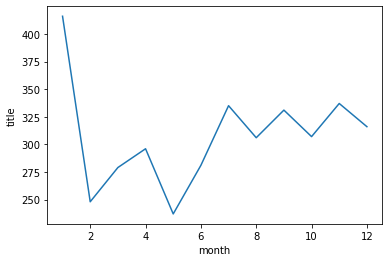

In [412]:
sns.lineplot(data = df_p.loc[df_p['country']=='United States'],x='month',y='title')

## In USA there is less content released in the months of Feb and May and very high content released in Jan

<AxesSubplot:xlabel='month', ylabel='title'>

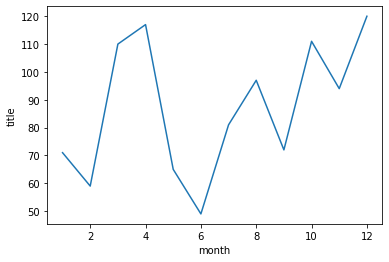

In [413]:
sns.lineplot(data = df_p.loc[df_p['country']=='India'],x='month',y='title')

## In India Feb, May and June has very low content released and march April and October have very high release, this may be because of festival and holiday season

<AxesSubplot:xlabel='month', ylabel='title'>

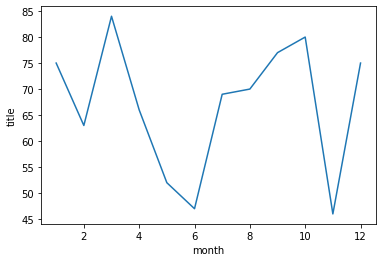

In [414]:
sns.lineplot(data = df_p.loc[df_p['country']=='United Kingdom'],x='month',y='title')

,release_year,type,title
0,1960,Movie,2
1,1962,Movie,2
2,1966,Movie,1
3,1971,Movie,1
4,1973,Movie,4
...,...,...,...
66,2019,TV Show,13
67,2020,Movie,37
68,2020,TV Show,28
69,2021,Movie,19


(1990.0, 2025.8)

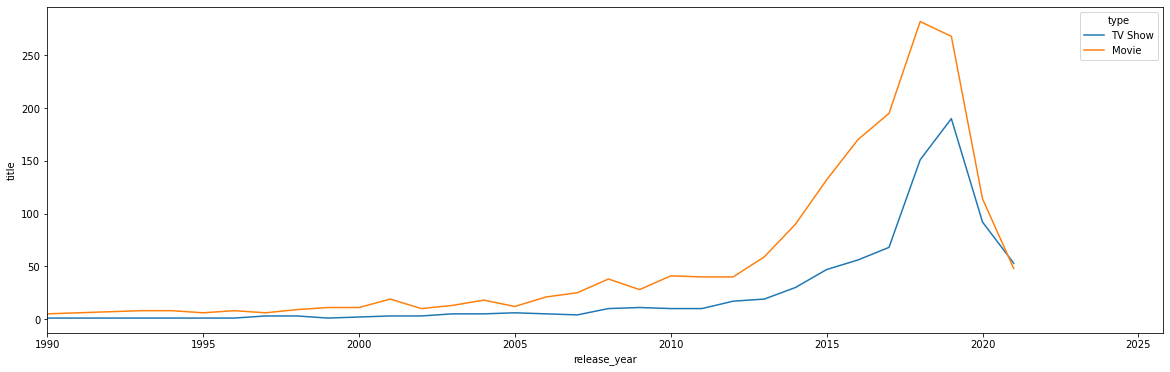

In [437]:
df_t = df.loc[df_final['country']=='United States',['type','title','release_year']].drop_duplicates()
df_t = df_t.groupby(['release_year','type'])['title'].count().reset_index()
plt.figure(figsize=(20,6))
sns.lineplot(data = df_t,x='release_year',y='title',hue='type')
plt.xlim((1990,None))

### In USA TV Shows are more popular to other countries, As India is much interested in International content and there is the growth in TV shows content in India, we can make more TV Shows available in India

(1990.0, 2024.05)

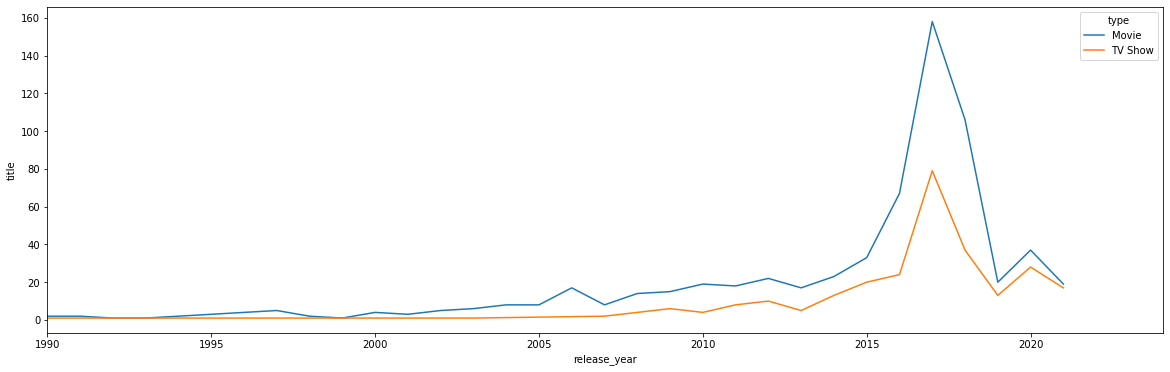

In [436]:
df_t = df.loc[df_final['country']=='India',['type','title','release_year']].drop_duplicates()
df_t = df_t.groupby(['release_year','type'])['title'].count().reset_index()
plt.figure(figsize=(20,6))
sns.lineplot(data = df_t,x='release_year',y='title',hue='type')
plt.xlim((1990,None))

### There is very low penetration of TV shows in India

(1990.0, 2024.3)

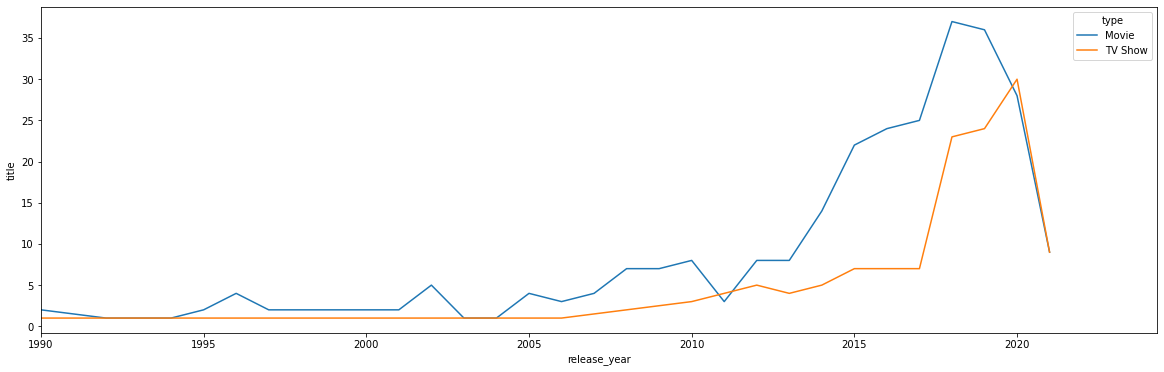

In [438]:
df_t = df.loc[df_final['country']=='United Kingdom',['type','title','release_year']].drop_duplicates()
df_t = df_t.groupby(['release_year','type'])['title'].count().reset_index()
plt.figure(figsize=(20,6))
sns.lineplot(data = df_t,x='release_year',y='title',hue='type')
plt.xlim((1990,None))

### TV shows are picking up well with Movies, We can see UK is more similar to USA, we can interchange the contents from USA to UK and vice versa to increase the watch time

In [441]:
temp_df = df.groupby(['rating'])['title'].count().reset_index()
rat_vals = temp_df.loc[temp_df['title']>10,'rating'].values
rat_cols = temp_df.loc[temp_df['title']>10].sort_values('title',ascending=False).rating

In [442]:
eachyrrat_df = df.groupby(['rating','year_added'])['title'].count().reset_index()

(2012.0, 2021.9)

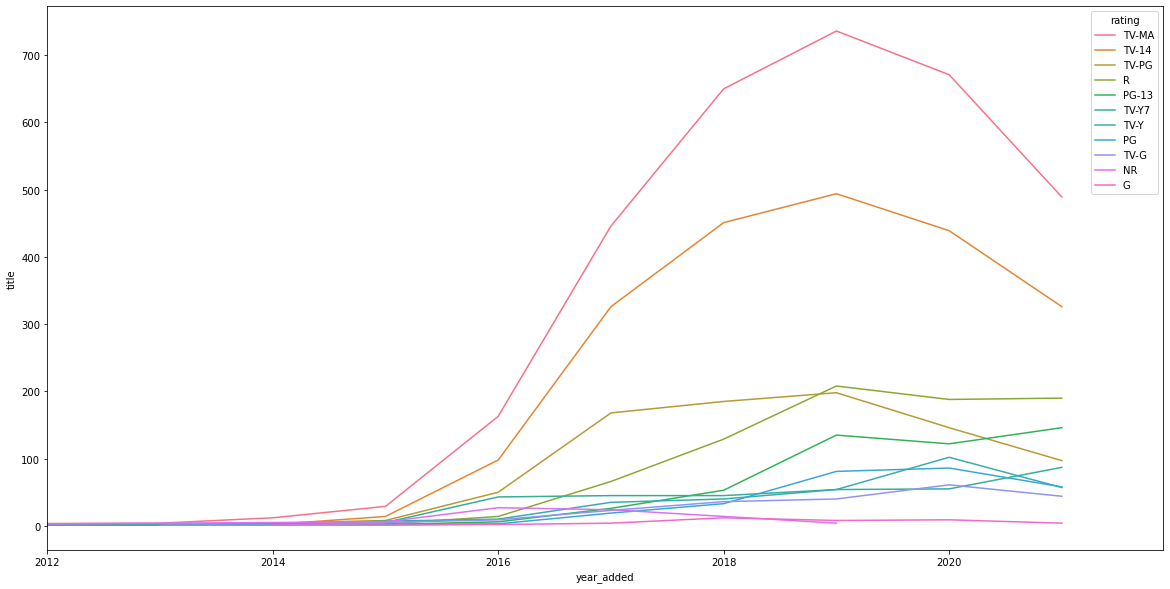

In [445]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=eachyrrat_df[eachyrrat_df['rating'].isin(rat_vals)],x='year_added',y='title',hue='rating',
            hue_order=rat_cols)
plt.xlim([2012, None])

In [ ]:
# TV-MA : For Mature Audiences has graphic sex scenes, foul language, explicit violence, or a combination of these elements
# TV-14 : Parents strongly cautioned. May not be suitable for ages under 14
# TV-PG : Parental Guidance suggested
# R : Restricted. May be inappropriate for ages under 17.
# PG-13 : Parents strongly cautioned. May be inappropriate for ages under 13.
# TV-Y7 : Suitable for ages 7 and up
# TV-Y : Appropriate for children of all ages
# PG : Parental Guidance suggested
# TV-G : suitable for all ages; these are not necessarily children's shows

### Releases of kids restricted content is decreasing drastically , thought not lesser than for all age groups content, but apporiate for all age shows are gaining popularity

### 7. Business Insights (10 Points) - Should include patterns observed in the data along with what you can infer from it

1. 70 of Netflix content is in Movies and remaining 30% in TV shows
2. Different countries have different months as high releases and low releases, most commonly Febrary have very less releases and in few countries June as well
3. TV shows with less number of season is more popular and Movies with approximate 100 mins duration.
4. USA & India has producing more Movies and USA & UK has producing more TV Shows.
5. Most of the TV shows have 1 season, only few of them went to decent 4-5 seasons
6. TV shows are catching up recently along ith the movies and most recent 2021 even with the fall of movies, there is not much fall in TV shows, this shows that TV shows are gaining popularity we can infer that directors who make frequent movies, tends to have lesser duration of movies
7. In the missing director column values 90%of the missing values are from TV Shows, so hence we are not replacing them, just leaving as nan
8. We can say that USA is most interested in Dramas, Comedies, Documentaries, Action and Advenure etc, we can also observe that USA content is better diversified compared to other countries
9. India loves International movies, Dramas, Comedies mostly with high concentration, and rest of the generes they arent much interested
10. In USA there is less content released in the months of Feb and May and very high content released in Jan
11. In India Feb, May and June has very low content released and march April and October have very high release, this may be because of festival and holiday seaso
 

### 8. Recommendations (10 Points) - Actionable items for business. No technical jargon. No complications. Simple action items that everyone can understand

1. As TV Shows are trending, we needs to produce more content in popular Genre.
2. Has less shows being added to Netflix in February, that's best time to release more content to have higher viewership.
3. Dropping the show with 1 or 2 seasons might result in loss in profit due to the money spent in promoting the series in the initial seasons
4. As India has lot of content from International Movies, India is a good place to have more other countries regional content dubbed into International language available
5. In USA TV Shows are more popular to other countries, As India is much interested in International content and there is the growth in TV shows content in India, we can make more TV Shows available in Indi
